<a href="https://colab.research.google.com/github/Aseem2004/Data_Science/blob/main/2_Data_Science_Libraries/Pandas%20/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pandas

In [1]:
import pandas as pd

In [ ]:
a=pd.Series([1,2,3,4], index=['a','b','c','d'])

In [ ]:
a

,0
a,1
b,2
c,3
d,4


In [ ]:
a.values

array([1, 2, 3, 4])

In [ ]:
a.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [ ]:
a['e']=5
a

,0
a,1
b,2
c,3
d,4
e,5


- The groupby() method in Pandas is used to group rows of a DataFrame based on certain column values. After grouping, you can perform various operations on each group, such as aggregation, transformation, or filtration.


In [ ]:
df=pd.DataFrame({'Name':['Fan','Bulb','Fan','Bulb'],
                 'Type':['A','A','B','A'],
                 'Energy':[200,300,250,100]})

In [ ]:
df

,Name,Type,Energy
0,Fan,A,200
1,Bulb,A,300
2,Fan,B,250
3,Bulb,A,100


In [ ]:
#Type is concatenated rather tha sum
df.groupby(['Name']).sum()

,Type,Energy
Name,,
Bulb,AA,400
Fan,AB,450


In [ ]:
#Excluded Type
df.groupby(['Name'])['Energy'].sum()

,Energy
Name,
Bulb,400
Fan,450


In [ ]:
df.groupby(['Name']).mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
df.groupby(['Name'])['Energy'].mean()

In [ ]:
df.groupby('Type').sum()

,Name,Energy
Type,,
A,FanBulbBulb,600
B,Fan,250


In [ ]:
df.groupby('Type')['Energy'].sum()

,Energy
Type,
A,600
B,250


In [ ]:
df.groupby(['Name','Type']).sum()

Energy
Name Type        
Bulb A        400
Fan  A        200
     B        250

- Hierarchical indexing, also known as multi-level indexing, is a feature in Pandas that allows you to work with DataFrames or Series that have multiple levels of indexing. This is useful for handling and analyzing data with complex hierarchical relationships. <br>


**MultiIndex:** MultiIndexis a pandas data structure that allows you to have multiple levels of indexes for rows or columns.



In [ ]:
A=[['Bulb','Bulb','Bulb','Fan','Fan','Fan'],
    ['A','B','C','A','B','C']]

In [ ]:
indx=pd.MultiIndex.from_arrays(A,names=('Name','Type'))

In [ ]:
indx

MultiIndex([('Bulb', 'A'),
            ('Bulb', 'B'),
            ('Bulb', 'C'),
            ( 'Fan', 'A'),
            ( 'Fan', 'B'),
            ( 'Fan', 'C')],
           names=['Name', 'Type'])

In [ ]:
pd.DataFrame(index=indx)

Empty DataFrame
Columns: []
Index: [(Bulb, A), (Bulb, B), (Bulb, C), (Fan, A), (Fan, B), (Fan, C)]

In [ ]:
df=pd.DataFrame({'Energy':[10,20,30,15,25,35]}, index=indx)

In [ ]:
df

Energy
Name Type        
Bulb A         10
     B         20
     C         30
Fan  A         15
     B         25
     C         35

In [ ]:
df.groupby(['Name']).sum()

,Energy
Name,
Bulb,60
Fan,75


In [ ]:
#Name is level 0
df.groupby(level=0).sum()

,Energy
Name,
Bulb,60
Fan,75


In [ ]:
#Type is level 1
df.groupby(level=1).sum()

,Energy
Type,
A,25
B,45
C,65


In [ ]:
df.groupby(level='Type').sum()

,Energy
Type,
A,25
B,45
C,65


* The `df.rolling()` function in Pandas provides the ability to perform rolling window calculations. This is particularly useful for time series data or any data where you want to compute metrics like moving averages, moving sums, etc., over a sliding window.

### Key Concepts:

1. **Rolling Window:**
   - A rolling window is a fixed-size window that slides over the data, performing a calculation at each position of the window.

2. **Window Size:**
   - The size of the window is defined by the `window` parameter, which specifies the number of observations included in each calculation.

3. **Calculations:**
   - Common calculations include `mean()`, `sum()`, `max()`, `min()`, and more. You can apply these methods directly after calling `rolling()`.

###Parameters: <br>

- **`window`:** The number of observations in each window.
- **`min_periods`:** Minimum number of observations in the window required to have a value (default is equal to the window size). <b>It will give NaN otherwise.</b>




In [ ]:
import numpy as np

In [ ]:
df=pd.DataFrame({'A':np.random.randint(0,10,5),
                 'B':np.random.randint(0,10,5),
                 'C':np.random.randint(0,10,5),
                 'D':np.random.randint(0,10,5)})

In [ ]:
df

,A,B,C,D
0,1,6,3,6
1,8,7,4,3
2,2,8,8,3
3,1,8,7,8
4,0,9,4,5


In [ ]:
#Nan+1, 1+8, 8+2, 2+1, 1+0 (for column A)
df.rolling(2).sum()

,A,B,C,D
0,NaN,NaN,NaN,NaN
1,9.0,13.0,7.0,9.0
2,10.0,15.0,12.0,6.0
3,3.0,16.0,15.0,11.0
4,1.0,17.0,11.0,13.0


In [ ]:
#1(as min_periods is set to 1), 1+8, 8+2, 2+1, 1+0 (for column A)
df.rolling(2, min_periods=1).sum()

,A,B,C,D
0,1.0,6.0,3.0,6.0
1,9.0,13.0,7.0,9.0
2,10.0,15.0,12.0,6.0
3,3.0,16.0,15.0,11.0
4,1.0,17.0,11.0,13.0


In [ ]:
df.rolling(3).mean()

,A,B,C,D
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,3.666667,7.000000,5.000000,4.000000
3,3.666667,7.666667,6.333333,4.666667
4,1.000000,8.333333,6.333333,5.333333


* The df.where() function in Pandas is used to replace values in a DataFrame that do not meet a certain condition with NaN (or another specified value). It can be thought of as a way to filter data while preserving the structure of the DataFrame. <br>
df.where(condition,action): action performed when condition is False<br>
- cond: The condition to check. It should be a boolean DataFrame of the same shape as df. <br>
- other: The value to replace the elements with <b>where the condition is False. The default is NaN.</b>

In [ ]:
df=pd.DataFrame(np.arange(10).reshape(5,2),columns=['A','B'])

In [ ]:
df

,A,B
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [ ]:
df.where(df>5) #Replaced with default NaN

,A,B
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,6.0,7.0
4,8.0,9.0


In [ ]:
df.where(df>5,-1)

,A,B
0,-1,-1
1,-1,-1
2,-1,-1
3,6,7
4,8,9


In [ ]:
x=(df>5) | (df%3==0)

In [ ]:
x

,A,B
0,True,False
1,False,True
2,False,False
3,True,True
4,True,True


In [ ]:
df.where(x,-df)

,A,B
0,0,-1
1,-2,3
2,-4,-5
3,6,7
4,8,9


* The pd.clip(lower,upper) function in Pandas is used to limit the values in a DataFrame or Series to a specified range. Values below a given lower bound are replaced with the lower bound, and values above an upper bound are replaced with the upper bound. It’s a useful method for constraining data within a particular range, especially in scenarios like outlier handling.



In [ ]:
df=pd.DataFrame(np.random.randint(0,100,(5,10)),columns=list('ABCDEFGHIJ'))

In [ ]:
df

,A,B,C,D,E,F,G,H,I,J
0,27,88,55,63,38,44,53,36,52,94
1,0,77,29,3,66,94,91,1,63,35
2,43,49,77,26,60,49,1,42,33,94
3,72,79,82,61,88,88,86,1,15,75
4,10,29,98,36,30,72,14,20,66,24


In [ ]:
df.clip(30,50)

,A,B,C,D,E,F,G,H,I,J
0,30,50,50,50,38,44,50,36,50,50
1,30,50,30,30,50,50,50,30,50,35
2,43,49,50,30,50,49,30,42,33,50
3,50,50,50,50,50,50,50,30,30,50
4,30,30,50,36,30,50,30,30,50,30


In [ ]:
#Can be achieved using conditionals as well
df[df>50]=50
df[df<30]=30
df

,A,B,C,D,E,F,G,H,I,J
0,30,50,50,50,38,44,50,36,50,50
1,30,50,30,30,50,50,50,30,50,35
2,43,49,50,30,50,49,30,42,33,50
3,50,50,50,50,50,50,50,30,30,50
4,30,30,50,36,30,50,30,30,50,30


In [ ]:
#Can be achieved using where command as well
df.where((df<50),50)
df.where((df>30),30)

,A,B,C,D,E,F,G,H,I,J
0,30,50,50,50,38,44,50,36,50,50
1,30,50,30,30,50,50,50,30,50,35
2,43,49,50,30,50,49,30,42,33,50
3,50,50,50,50,50,50,50,30,30,50
4,30,30,50,36,30,50,30,30,50,30


In [ ]:
#Can be achieved using where command as well
df.where(~(df>50),50)
df.where(~(df<30),30)

,A,B,C,D,E,F,G,H,I,J
0,30,50,50,50,38,44,50,36,50,50
1,30,50,30,30,50,50,50,30,50,35
2,43,49,50,30,50,49,30,42,33,50
3,50,50,50,50,50,50,50,30,30,50
4,30,30,50,36,30,50,30,30,50,30


- The pd.merge() function in Pandas is used to combine two DataFrames based on a common column(s) or index. It is similar to SQL joins and is used to merge data on one or more keys.<br>
Parameters: <br>
left: The first DataFrame to be merged. <br>
right: The second DataFrame to be merged. <br>
on: Column or index level names to join on. Must be found in both DataFrames.<br>
how: Type of merge to be performed: <br>
 * 'left': Keep all rows from the left DataFrame.<br>
 * 'right': Keep all rows from the right DataFrame.<br>
 * 'outer': Keep all rows from both DataFrames, with NaN where there are no matches.<br>
 * 'inner': Keep only rows that have matching keys in both DataFrames (default).<br>


In [ ]:
df1=pd.DataFrame({'E':['A','B','C','D'],
                  'G':['W','J','X','Z']})

df2=pd.DataFrame({'E':['C','A','B','D'],
                  'H':[2010,2006,2012,2020]})

In [ ]:
df1

,E,G
0,A,W
1,B,J
2,C,X
3,D,Z


In [ ]:
df2

,E,H
0,C,2010
1,A,2006
2,B,2012
3,D,2020


In [ ]:
df3=pd.merge(df1,df2)

In [ ]:
df3

,E,G,H
0,A,W,2006
1,B,J,2012
2,C,X,2010
3,D,Z,2020


In [ ]:
df4=pd.DataFrame({'G':['P','Q','R'],
                  'S':['A','B','C']})
df4

,G,S
0,P,A
1,Q,B
2,R,C


In [ ]:
#If no column is same in G, none is copied in merge
pd.merge(df3,df4,on='G')

,E,G,H,S


In [ ]:
pd.merge(df3,df4,how='left') #Left join

,E,G,H,S
0,A,W,2006,NaN
1,B,J,2012,NaN
2,C,X,2010,NaN
3,D,Z,2020,NaN


In [ ]:
df5=pd.DataFrame({'G':['W','X','J'],
                  'S':['A','B','C']})
df5

,G,S
0,W,A
1,X,B
2,J,C


In [ ]:
#3 columns are same in G, hence only 3 are copied out of 4
pd.merge(df3,df5)

,E,G,H,S
0,A,W,2006,A
1,B,J,2012,C
2,C,X,2010,B


In [ ]:
pd.merge(df3,df5,on='G')

,E,G,H,S
0,A,W,2006,A
1,B,J,2012,C
2,C,X,2010,B


* The pd.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean') function in Pandas is a powerful tool for summarizing data in a DataFrame. It allows you to aggregate and organize data based on one or more keys, similar to Excel's pivot tables. This function is especially useful for transforming large datasets into meaningful summaries. <br>
Parameters: <br>
data: The DataFrame to be pivoted. <br>
values: Column(s) to aggregate. If omitted, all numeric data is aggregated. <br>
index: Keys to group by on the pivot table's index. <br>
columns: Keys to group by on the pivot table's columns.<br>
aggfunc: The function to use for aggregation, e.g., 'mean', 'sum', 'count', etc. The default is 'mean'.



In [ ]:
from seaborn import load_dataset

In [ ]:
t=load_dataset('titanic')

In [ ]:
t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
t.rename(columns={'sex':'gender'},inplace=True)

In [ ]:
t.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
t['deck']

,deck
0,NaN
1,C
2,NaN
3,C
4,NaN
...,...
886,NaN
887,B
888,NaN
889,C


In [ ]:
t['deck'].isnull().sum()

688

In [ ]:
t.drop(columns=['deck'],inplace=True)

In [ ]:
t.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [ ]:
t.groupby(['gender','class'])['survived'].mean()

<ipython-input-47-e56e17682a1e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t.groupby(['gender','class'])['survived'].mean()


gender  class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

* The pd.unstack() function in Pandas is used to pivot (reshape) a DataFrame by moving a level from the row index to the column index, effectively "unstacking" it. This function is useful for converting a multi-indexed DataFrame into a more conventional DataFrame format, where levels of the index become columns.

In [ ]:
t.groupby(['gender','class'])['survived'].mean().unstack()

<ipython-input-48-1b4f2b9a2b0d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t.groupby(['gender','class'])['survived'].mean().unstack()


class,First,Second,Third
gender,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
t.pivot_table('survived', index='gender',columns='class',aggfunc='mean')

class,First,Second,Third
gender,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
t.pivot_table('survived', index='class',columns='gender',aggfunc='mean')

gender,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


* The pd.cut() function in Pandas is used to segment and sort data values into discrete bins or intervals. It is particularly useful when you want to categorize a continuous variable into different intervals or bins.


In [ ]:
#Cutting the age into two intervals of 0-18 and 18-100
partition=pd.cut(t['age'],[0,18,100])
partition.head(10)

,age
0,"(18.0, 100.0]"
1,"(18.0, 100.0]"
2,"(18.0, 100.0]"
3,"(18.0, 100.0]"
4,"(18.0, 100.0]"
5,NaN
6,"(18.0, 100.0]"
7,"(0.0, 18.0]"
8,"(18.0, 100.0]"
9,"(0.0, 18.0]"


In [ ]:
t.pivot_table('survived', index=['gender', partition], columns='class', aggfunc='mean')

class                First    Second     Third
gender age                                    
female (0, 18]    0.909091  1.000000  0.511628
       (18, 100]  0.972973  0.900000  0.423729
male   (0, 18]    0.800000  0.600000  0.215686
       (18, 100]  0.375000  0.071429  0.133663

* The pd.qcut(x,q) function in Pandas is used to divide a series of data into equal-sized buckets or quantiles. Unlike pd.cut(), which divides the data into bins of equal width, pd.qcut() ensures that each bin contains approximately the same number of data points, making it particularly useful for quantile-based discretization. <br>
Parameters:<br>
x: The data to be binned. This can be an array-like structure or a Pandas Series.<br>
q: The number of quantiles or the list of quantiles you want to create. If q is an integer, q quantiles are created. If it’s a list, it should specify the quantile boundaries.

In [ ]:
fare=pd.qcut(t['fare'],3)
fare

,fare
0,"(-0.001, 8.662]"
1,"(26.0, 512.329]"
2,"(-0.001, 8.662]"
3,"(26.0, 512.329]"
4,"(-0.001, 8.662]"
...,...
886,"(8.662, 26.0]"
887,"(26.0, 512.329]"
888,"(8.662, 26.0]"
889,"(26.0, 512.329]"


In [ ]:
fare.unique()

[(-0.001, 8.662], (26.0, 512.329], (8.662, 26.0]]
Categories (3, interval[float64, right]): [(-0.001, 8.662] < (8.662, 26.0] < (26.0, 512.329]]

In [ ]:
t.pivot_table('survived', index=['gender',fare], columns=['class',partition], aggfunc='mean')

class                      First            Second               Third  \
age                      (0, 18] (18, 100] (0, 18] (18, 100]   (0, 18]   
gender fare                                                              
female (-0.001, 8.662]       NaN       NaN     NaN       NaN  0.700000   
       (8.662, 26.0]         NaN  1.000000     1.0  0.877551  0.583333   
       (26.0, 512.329]  0.909091  0.972222     1.0  1.000000  0.111111   
male   (-0.001, 8.662]       NaN  0.000000     NaN       NaN  0.166667   
       (8.662, 26.0]         NaN  0.000000     0.5  0.086957  0.500000   
       (26.0, 512.329]  0.800000  0.400000     0.8  0.000000  0.052632   

class                             
age                    (18, 100]  
gender fare                       
female (-0.001, 8.662]  0.523810  
       (8.662, 26.0]    0.433333  
       (26.0, 512.329]  0.125000  
male   (-0.001, 8.662]  0.127389  
       (8.662, 26.0]    0.102564  
       (26.0, 512.329]  0.500000

In [ ]:
t.pivot_table('survived', index=['gender',fare], columns=[partition, 'class'], aggfunc='mean')

age                      (0, 18]                  (18, 100]            \
class                      First Second     Third     First    Second   
gender fare                                                             
female (-0.001, 8.662]       NaN    NaN  0.700000       NaN       NaN   
       (8.662, 26.0]         NaN    1.0  0.583333  1.000000  0.877551   
       (26.0, 512.329]  0.909091    1.0  0.111111  0.972222  1.000000   
male   (-0.001, 8.662]       NaN    NaN  0.166667  0.000000       NaN   
       (8.662, 26.0]         NaN    0.5  0.500000  0.000000  0.086957   
       (26.0, 512.329]  0.800000    0.8  0.052632  0.400000  0.000000   

age                               
class                      Third  
gender fare                       
female (-0.001, 8.662]  0.523810  
       (8.662, 26.0]    0.433333  
       (26.0, 512.329]  0.125000  
male   (-0.001, 8.662]  0.127389  
       (8.662, 26.0]    0.102564  
       (26.0, 512.329]  0.500000

In [ ]:
t.pivot_table(index='gender',columns='class',aggfunc=
              {'survived':'sum','fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
gender                                                        
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

* Applying str methods: df.str.method()

In [ ]:
t.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [ ]:
t['gender']=t['gender'].str.upper()

In [ ]:
t.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,MALE,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,FEMALE,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,FEMALE,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,FEMALE,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,MALE,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [ ]:
t.embark_town.str.len()

,embark_town
0,11.0
1,9.0
2,11.0
3,11.0
4,11.0
...,...
886,11.0
887,11.0
888,11.0
889,9.0


* The pd.to_datetime() function in Pandas is used to convert a column or series of date and time strings into Pandas datetime objects, which allows for easy manipulation, filtering, and analysis of date and time data. Standard id yyyy-mm-dd.

In [ ]:
from datetime import datetime

In [ ]:
date=pd.to_datetime([datetime(2016,7,3), '10th of July,2018', '2017-Jul-19', '10-09-2016', '20160305', '12/12/2004'])

In [ ]:
date

DatetimeIndex(['2016-07-03', '2018-07-10', '2017-07-19', '2016-10-09',
               '2016-03-05', '2004-12-12'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
date-date[0]

TimedeltaIndex(['0 days', '737 days', '381 days', '98 days', '-120 days',
                '-4221 days'],
               dtype='timedelta64[ns]', freq=None)

* The pd.to_period() function in Pandas is used to convert a datetime or timedelta data type into a Period type, which represents a span of time like a month, quarter, or year. This is useful when you want to work with time periods rather than specific timestamps. <br>
Supported formats:<br>
 * 'A' for annual periods (e.g., 2023, 2024).<br>
 * 'Q' for quarterly periods (e.g., 2023Q1, 2024Q2).<br>
 * 'M' for monthly periods (e.g., 2023-08, 2024-01).<br>
 * 'W' for weekly periods.<br>
 * 'D' for daily periods.<br>
 * 'H' for hourly periods.<br>


In [ ]:
date.to_period('M') #Month

PeriodIndex(['2016-07', '2018-07', '2017-07', '2016-10', '2016-03', '2004-12'], dtype='period[M]')

In [ ]:
date.to_period('H') #Hour

PeriodIndex(['2016-07-03 00:00', '2018-07-10 00:00', '2017-07-19 00:00',
             '2016-10-09 00:00', '2016-03-05 00:00', '2004-12-12 00:00'],
            dtype='period[H]')

#Plotting with Pandas

In [3]:
import numpy as np

In [12]:
df=pd.DataFrame(np.random.randn(1000,3),columns=list('ABC'))

In [13]:
df.head()

,A,B,C
0,-2.157671,-0.318576,-1.872342
1,-0.430469,-0.451387,0.190616
2,0.726002,-1.004118,-0.077938
3,1.518392,0.232788,0.692816
4,0.255543,-0.529997,-0.500879


*  df.plot(): Simple plot b/w x and y values

<Axes: >

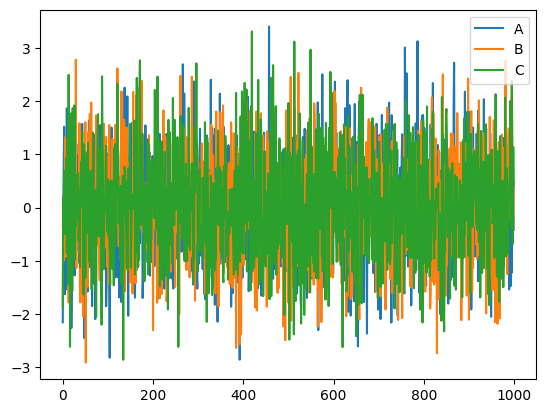

In [14]:
df.plot()

* df.plot.hist(): To plot histogram

<Axes: ylabel='Frequency'>

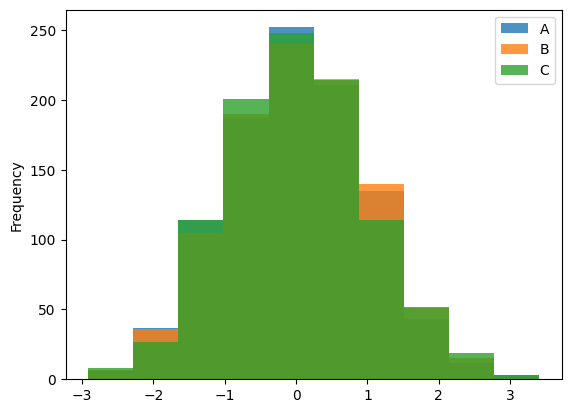

In [21]:
df.plot.hist(alpha=0.8)

<Axes: ylabel='Frequency'>

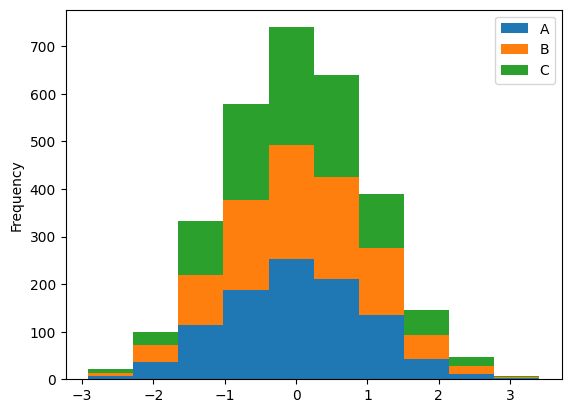

In [22]:
df.plot.hist(stacked=True)

<Axes: ylabel='Frequency'>

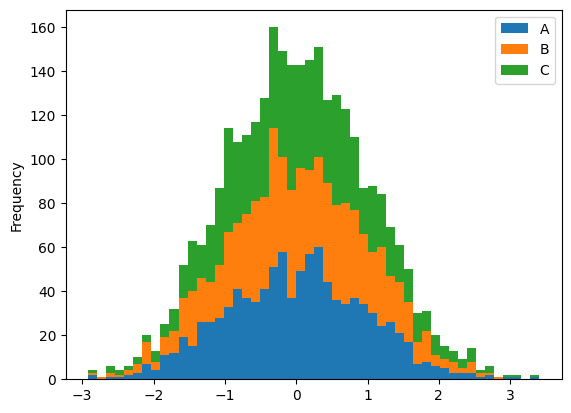

In [23]:
df.plot.hist(stacked=True, bins=50)

* df.plot.area(): An area plot is a type of data visualization that displays quantitative data over a continuous interval or time period. Unlike line plots, area plots fill the space below the line (or lines) with color or shading, creating a "filled" effect.

In [33]:
df2=pd.DataFrame(np.random.rand(10,3),columns=list('ABC'))

In [34]:
df2.head()

,A,B,C
0,0.592609,0.260540,0.440660
1,0.328396,0.816417,0.694615
2,0.407411,0.453325,0.792853
3,0.045874,0.785827,0.585288
4,0.046956,0.376426,0.709343


<Axes: >

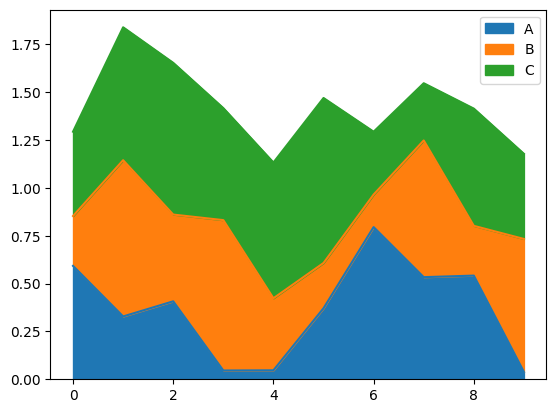

In [36]:
df2.plot.area()

* Stacked Area Plot: In a stacked area plot, multiple data series are stacked on top of one another, allowing you to see the cumulative total and the contribution of each series to the overall total.<br>
* Unstacked Area Plot: In an unstacked area plot, the areas are displayed side by side without stacking, which helps compare the individual values more clearly.

<Axes: >

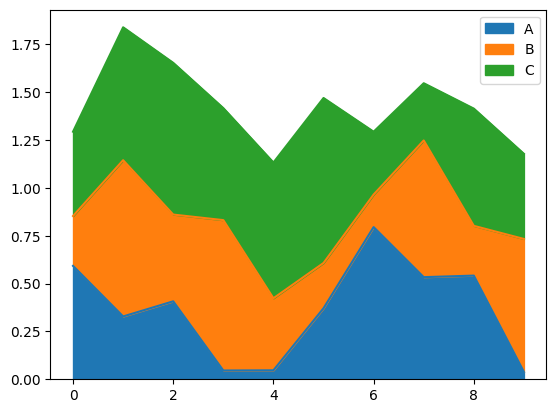

In [37]:
df2.plot.area(stacked=True)

<Axes: >

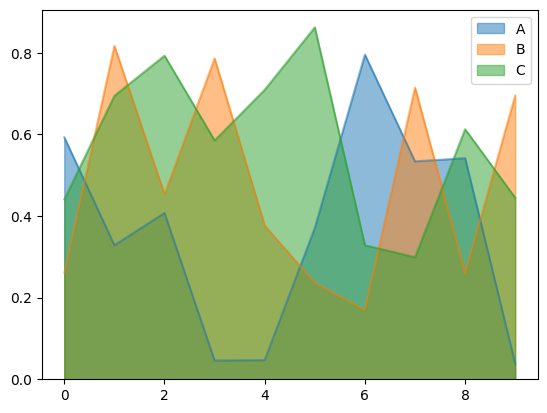

In [38]:
df2.plot.area(stacked=False)

* df.plot.pie(): The df.plot.pie() function in Pandas is used to create a pie chart based on the values in a DataFrame.<br>
 * Need to specify y='col_name' to plot wrt that column or subplot=True to draw wrt to every column

In [45]:
df3=pd.DataFrame(np.random.rand(5,3)*10,columns=list('ABC'))

In [46]:
df3

,A,B,C
0,8.376081,0.640525,0.097426
1,3.237380,4.384884,8.651359
2,1.825912,8.034744,2.030457
3,5.670209,8.268020,2.471795
4,4.641939,3.130120,4.205088


<Axes: ylabel='A'>

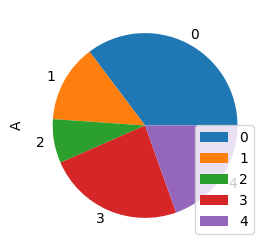

In [47]:
df3.plot.pie(y='A',figsize=(5,3))

array([<Axes: ylabel='A'>, <Axes: ylabel='B'>, <Axes: ylabel='C'>],
      dtype=object)

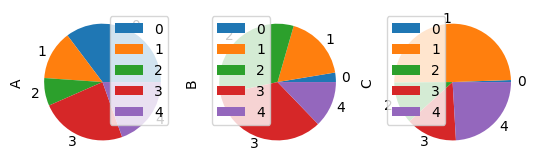

In [49]:
df3.plot.pie(subplots=True)